## Урок_9. Линейная регрессия. Логистическая регрессия

In [280]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

### 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

R = 78.76% модель эффективна


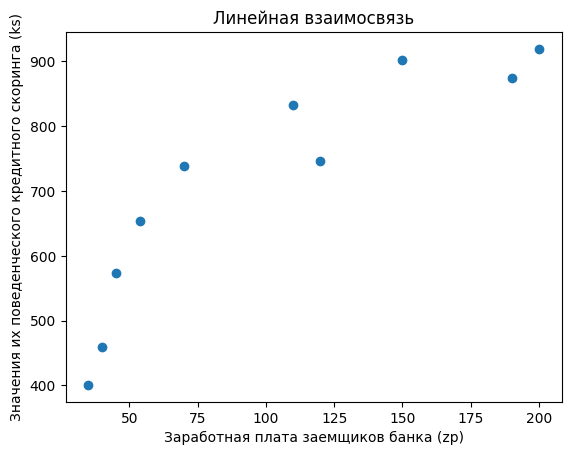

In [281]:
x = zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

# Коэффициент детерминации (на этот показатель модель описывает реальные данные)
R = np.corrcoef(x, y)[0, 1] ** 2 
print(f'R = {R*100:.2f}% модель эффективна')

plt.scatter(x, y)
plt.title('Линейная взаимосвязь')
plt.xlabel('Заработная плата заемщиков банка (zp)')
plt.ylabel('Значения их поведенческого кредитного скоринга (ks)');

<u>_With Intercept_</u>

Рассчет коэффициентов линейной регрессии.

$$\bar{y} = a + b\cdot x$$

$$b = \frac{n\sum^n_{i=1}x_iy_i - (\sum^n_{i=1}x_i)(\sum^n_{i=1}y_i)}{n\sum^n_{i=1}x^2_i - (\sum^n_{i=1}x_i)^2}; a = \bar{y}-b\bar{x}$$

a = 444.1773573243596 b = 2.620538882402765


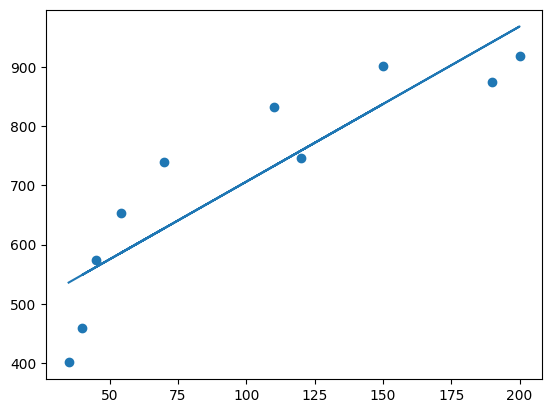

In [282]:
b = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x ** 2) - np.mean(x) ** 2)
a = np.mean(y) - b * np.mean(x)
print('a = {}'.format(a), 'b = {}'.format(b)) # модель y_pred = a + b * x => 444,17 + 2,62 * x

plt.scatter(x, y)
plt.plot(x, a + b * x);

> Расчет наглядно показывает линейную взаимосвязь между величиной заработной платы и значением кредитного скоринга.

<u>_Without Intercept_</u>

Матричный метод расчета коэффициентов линейной регрессии.

$$\bar{B} = (X^T\cdot X)^{-1}\cdot X^T\cdot Y$$

In [283]:
x_n = len(zp)
y_n = len(ks)

x_matrix = x.reshape((x_n, 1))
y_matrix = y.reshape((y_n, 1))
X = np.hstack([np.ones((x_n, 1)), x_matrix])

B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T @ y_matrix) # dot - перемножение, linalg.inv - обращение к обратной матрице
print('a = {}'.format(B[0,0]), 'b = {}'.format(B[1,0]))
B

a = 444.17735732435943 b = 2.620538882402764


array([[444.17735732],
       [  2.62053888]])

### 2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

$$mse = \frac{\sum(y-y_{pred})^2}{n} \;для\; \bar{y} = \beta_1x$$

In [294]:
# Функция потерь 𝑚𝑠𝑒 - мера измерения ошибок, которые функция делает на нашем наборе данны
def mse(B1, x, y):
  return np.sum((y - B1 * x) ** 2) / len(x)

In [340]:
alpha = 1e-6 # скорость обучения
B1 = 0.1
n = len(x)

for i in range(50_000):
  B1 -= alpha * (2/n) * np.sum((B1 * x - y) * x)
  if i % 5000 == 0:
    print('Iteranion = {i}, B1 = {B1}, mse = {mse}'.format(i = i, B1 = B1, mse = mse(B1, x, y)))

mse(5.88982, x, y) # проверка через функцию

print('------')
print(f'коэффициент линейной регрессии = {B1}')

Iteranion = 0, B1 = 0.25952808, mse = 493237.7212546963
Iteranion = 5000, B1 = 5.889820420132673, mse = 56516.85841571943
Iteranion = 10000, B1 = 5.889820420132673, mse = 56516.85841571943
Iteranion = 15000, B1 = 5.889820420132673, mse = 56516.85841571943
Iteranion = 20000, B1 = 5.889820420132673, mse = 56516.85841571943
Iteranion = 25000, B1 = 5.889820420132673, mse = 56516.85841571943
Iteranion = 30000, B1 = 5.889820420132673, mse = 56516.85841571943
Iteranion = 35000, B1 = 5.889820420132673, mse = 56516.85841571943
Iteranion = 40000, B1 = 5.889820420132673, mse = 56516.85841571943
Iteranion = 45000, B1 = 5.889820420132673, mse = 56516.85841571943
------
коэффициент линейной регрессии = 5.889820420132673


### 3. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [341]:
def mse_2(B0, B1, x, y):
  return np.sum((B0 + B1 * x - y) ** 2) / len(x)

alpha = 3e-5 # скорость обучения
B1 = 0.1
B0 = 0.1

for i in range(10 ** 6):
  B1 -= alpha * (2 / n) * np.sum((B0 + B1 * x - y) * x)
  B0 -= alpha * (2 / n) * np.sum(B0 + B1 * x - y)
  if i % 10 ** 5 == 0:
    print('Iteranion = {i}, B1 = {B1}, B0 = {B0}, mse = {mse}'.format(i = i, B1 = B1, B0 = B0, mse = mse_2(B0, B1, x, y)))

print(f'-------')
print(f'a = B0 = {B0}, b = B1 = {B1}')

Iteranion = 0, B1 = 4.885234, B0 = 0.112866236344, mse = 70371.70347094424
Iteranion = 100000, B1 = 3.3339801911145575, B0 = 347.24821964907795, mse = 8853.661410791074
Iteranion = 200000, B1 = 2.776267277130596, B0 = 423.01987901716745, mse = 6583.964479636992
Iteranion = 300000, B1 = 2.6545309328046693, B0 = 439.5591496413471, mse = 6475.824326356467
Iteranion = 400000, B1 = 2.627958592164428, B0 = 443.16930514092576, mse = 6470.671967646793
Iteranion = 500000, B1 = 2.622158440278666, B0 = 443.95732191792973, mse = 6470.426482510438
Iteranion = 600000, B1 = 2.620892395922504, B0 = 444.12932848133295, mse = 6470.414786323202
Iteranion = 700000, B1 = 2.6206160465538653, B0 = 444.1668736944741, mse = 6470.414229056081
Iteranion = 800000, B1 = 2.620555725623448, B0 = 444.1750689807544, mse = 6470.4142025049805
Iteranion = 900000, B1 = 2.6205425589038502, B0 = 444.1768578297614, mse = 6470.414201239946
-------
a = B0 = 444.1772482941231, b = B1 = 2.6205396849135116


---

## Seminar_9

In [317]:
# y = b1 * x + b0, где x - влияющий параметр

Постройте графики для приведенных наборов данных. Найдите коэффициенты для линии 
регрессии и коэффициенты детерминации. Что вы замечаете? Нанесите на график модель 
линейной регрессии.

1.3 3.0
0.6282527881040891


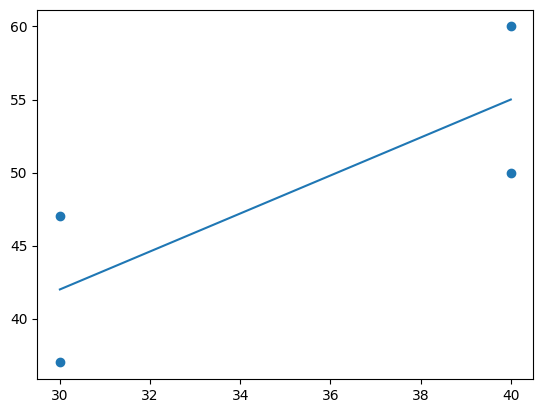

In [ ]:
x1= np.array([30, 30, 40, 40])
y1= np.array([37, 47, 50, 60]) 

b1 = (np.mean(x1 * y1) - np.mean(y1) * np.mean(x1)) / (np.mean(x1 ** 2) - np.mean(x1) ** 2)
b0 = np.mean(y1) - b1 * np.mean(x1)
print(b1, b0) # 1.3 * x + 3.0

R = np.corrcoef(x1, y1)[0, 1] ** 2 
print(R) # 62% модель эффективна . на этот показатель модель описывает реальные данные

plt.scatter(x1, y1)
plt.plot(x1, b1 * x1 + b0)
plt.show()


1.24 5.100000000000001
0.8846950517836595


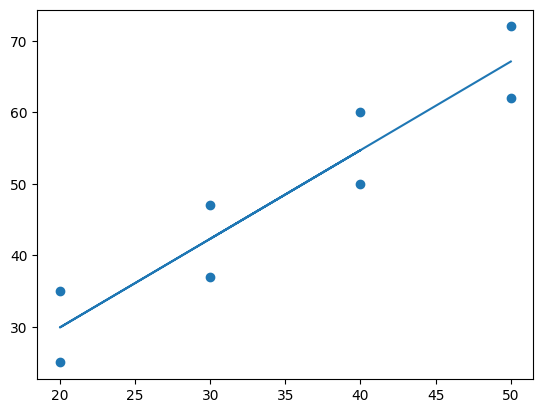

In [ ]:
x2= np.array([30, 30, 40, 40, 20, 20, 50, 50]) 
y2= np.array([37, 47, 50, 60, 25, 35, 62, 72]) 

b1 = (np.mean(x2 * y2) - np.mean(y2) * np.mean(x2)) / (np.mean(x2 ** 2) - np.mean(x2) ** 2)
b0 = np.mean(y2) - b1 * np.mean(x2)
print(b1, b0) # 1.24 * x + 5.1

R = np.corrcoef(x2, y2)[0, 1] ** 2 
print(R) # 88,5% модель эффективна

plt.scatter(x2, y2)
plt.plot(x2, b1 * x2 + b0)
plt.show()

1.2257142857142853 5.600000000000016
0.9459101071621311


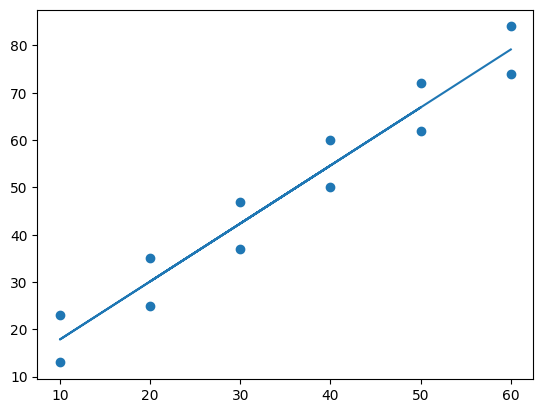

In [ ]:
x3 = np.array([30, 30, 40, 40, 20, 20, 50, 50, 10, 10, 60, 60]) 
y3 = np.array([37, 47, 50, 60, 25, 35, 62, 72, 13, 23, 74, 84])

b1 = (np.mean(x3 * y3) - np.mean(y3) * np.mean(x3)) / (np.mean(x3 ** 2) - np.mean(x3) ** 2)
b0 = np.mean(y3) - b1 * np.mean(x3)
print(b1, b0) # 1.22 * x + 5.6

R = np.corrcoef(x3, y3)[0, 1] ** 2 
print(R) # 94,6% модель эффективна

plt.scatter(x3, y3)
plt.plot(x3, b1 * x3 + b0)
plt.show()

In [ ]:
# матричный метод
lx = len(x3)
ly = len(y3)

X = x3.reshape(lx, 1)
Y = y3.reshape(ly, 1)

X2 = np.hstack([np.ones((lx, 1)), X])
B = np.dot(np.linalg.inv(np.dot(X2.T, X2)), X2.T @ Y) # dot - перемножение, linalg.inv - обращение к обратной матрице
print(B)

[[5.6       ]
 [1.22571429]]


$$mse = \frac{\sum(y-y_{pred})^2}{n}$$

In [ ]:
# функция потерь
def mse(B1, B0, X1, Y1, n):
    return np.sum(B0 + B1 * X1 - Y1) ** 2 / n

alpha = 1e-06 # скорость обучения
B0 = 4
B1 = 1
n = 12

for i in range(10 ** 5):
    B1 -= alpha * (2 / n) * np.sum((B0 + B1 * x3 - y3) * x3)
    B0 -= alpha * (2 / n) * np.sum(B0 + B1 * x3 - y3)
    if i % 5000 == 0:
        print('B1 = {}'.format(B1), 'B0 = {}'.format(B0), 'mse = {}'.format(mse(B0, B1, x3, y3, n)))

B1 = 1.0007966666666666 B0 = 4.000018944233333 mse = 102678.24059249925
B1 = 1.262431915672081 B0 = 4.0091014922863435 mse = 103968.83531437146
B1 = 1.2623614756487167 B0 = 4.012156354163351 mse = 104207.66857964767
B1 = 1.262291105321776 B0 = 4.015205348553223 mse = 104446.3161857191
B1 = 1.262220870120675 B0 = 4.018248488231371 mse = 104684.77770525472
B1 = 1.2621507697859617 B0 = 4.021285784440084 mse = 104923.05245134748
B1 = 1.2620808040586593 B0 = 4.024317248400079 mse = 105161.13974241704
B1 = 1.2620109726802982 B0 = 4.027342891310471 mse = 105399.0389021786
B1 = 1.2619412753928976 B0 = 4.030362724348938 mse = 105636.74925962707
B1 = 1.261871711938976 B0 = 4.033376758671623 mse = 105874.27014900047
B1 = 1.261802282061544 B0 = 4.03638500541328 mse = 106111.60090976341
B1 = 1.2617329855041062 B0 = 4.039387475687294 mse = 106348.74088657979
B1 = 1.2616638220106626 B0 = 4.042384180585695 mse = 106585.68942928607
B1 = 1.2615947913257 B0 = 4.045375131179238 mse = 106822.44589286887
B1

0.5000909090909076 3.0000909090909245
0.6665424595087752


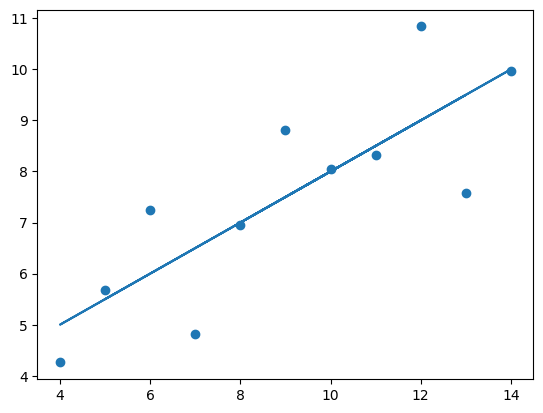

In [ ]:
x = np.array([10,8, 13, 9,11,14, 6,4,12, 7,5])
y = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68 ])

b1 = (np.mean(x * y) - np.mean(y) * np.mean(x)) / (np.mean(x ** 2) - np.mean(x) ** 2)
b0 = np.mean(y) - b1 * np.mean(x)
print(b1, b0) # 0.5 * x + 3.0

R = np.corrcoef(x, y)[0, 1] ** 2 
print(R) # 66,6% модель эффективна

plt.scatter(x, y)
plt.plot(x, b1 * x + b0)
plt.show()

In [ ]:
# Проверить оставшиеся условия применимости линейной регрессии

y_pred = b1 * y + b0
t = y - y_pred
stats.shapiro(t)

ShapiroResult(statistic=0.9769276976585388, pvalue=0.9466750621795654)

In [ ]:
# Оценить статистическую значимость полученной модели линейной регрессии

df1 = 2 - 1
df2 = 11 -2
f_tabl = stats.f.ppf(0.95, df1, df2)
f_tabl

5.117355029199227

$$F_p = MS_f/MS_o$$

In [ ]:
SSF = np.sum((y_pred - np.mean(y)) ** 2)
SSO = np.sum((y - y_pred) ** 2)
MSF = SSF / df1
MSO = SSO / df2
F = MSF / MSO
F

9.004093985482044

0.4997272727272716 3.0024545454545555
0.6663240410665595


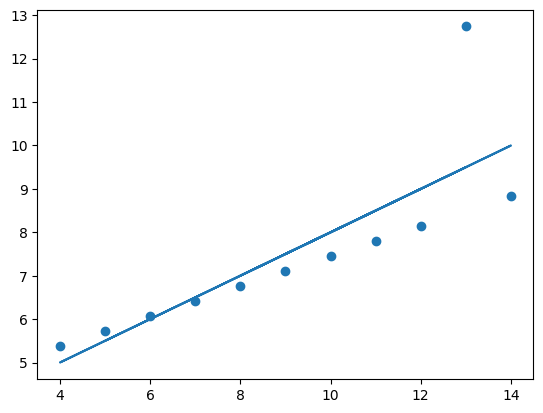

In [ ]:
x= np.array([ 10,8, 13, 9,11,14, 6,4,12, 7,5 ])
y = np.array([7.46,6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])

b1 = (np.mean(x * y) - np.mean(y) * np.mean(x)) / (np.mean(x ** 2) - np.mean(x) ** 2)
b0 = np.mean(y) - b1 * np.mean(x)
print(b1, b0)

R = np.corrcoef(x, y)[0, 1] ** 2 
print(R) 

plt.scatter(x, y)
plt.plot(x, b1 * x + b0)
plt.show()